In [1]:
import pennylane as qml
from pennylane import numpy as np

In [2]:
dev = qml.device("lightning.qubit", wires=3)

In [6]:
@qml.qnode(dev)
def circuit():
    qml.PauliZ(wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 2])
    return qml.expval(qml.PauliZ(0))

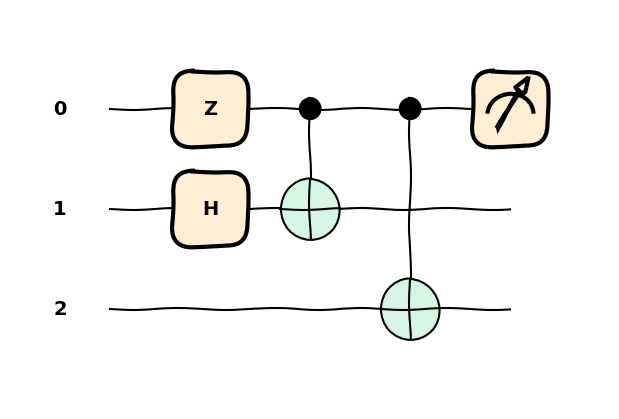

In [7]:
import matplotlib.pyplot as plt
qml.draw_mpl(circuit, decimals=1, style="sketch")()
plt.show()

In [8]:
sample_dev = qml.device("lightning.qubit", wires=3, shots=1000)

In [20]:
@qml.qnode(sample_dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    return qml.sample(qml.PauliZ(0))

([<matplotlib.axis.XTick at 0x7f84958749d0>,
 [Text(-1, 0, '−1'), Text(1, 0, '1')])

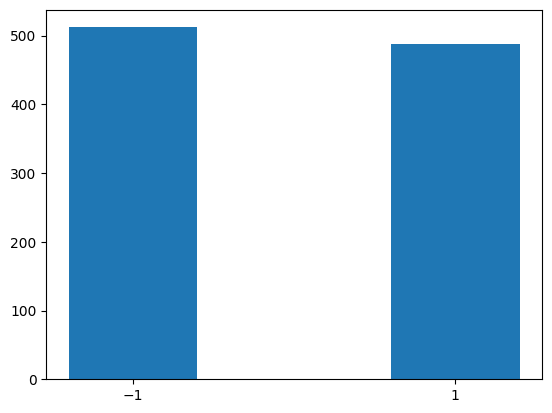

In [21]:
labels, counts = np.unique(circuit(), return_counts=True)
plt.bar(labels, counts, align='center')
plt.xticks(labels)

In [26]:
def exercise_ansatz(params):
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.RY(params[2], wires=2)
    qml.RX(params[3], wires=0)
    qml.RX(params[4], wires=1)
    qml.RX(params[5], wires=2)
    qml.CNOT(wires=[1,0])
    qml.CNOT(wires=[2,1])
    qml.CNOT(wires=[0,2])
    qml.RX(params[6], wires=0)
    qml.RX(params[7], wires=1)
    qml.RX(params[8], wires=2)
    
@qml.qnode(dev)
def optimized_circuit(params):
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    exercise_ansatz(params)
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2))]

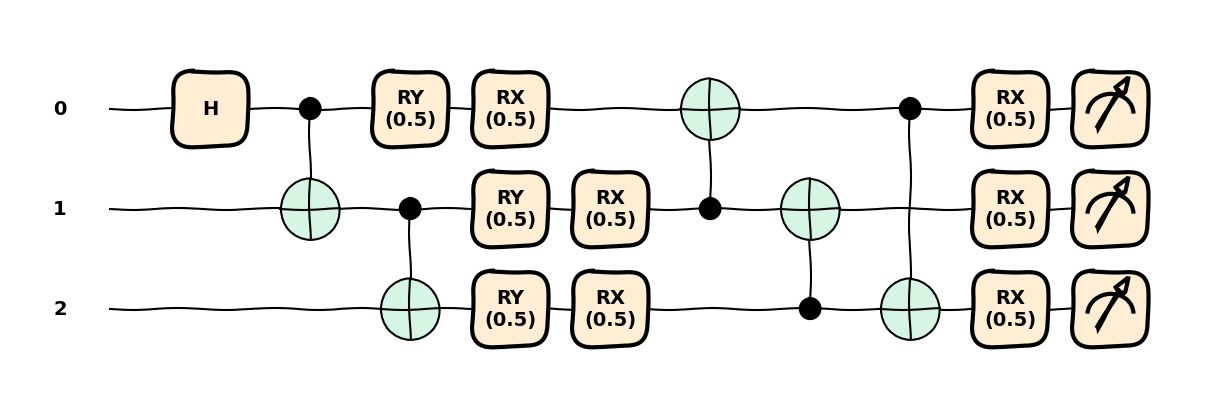

In [27]:
qml.draw_mpl(optimized_circuit, decimals=1, style="sketch")([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])
plt.show()

In [28]:
def cost(params):
    return 1-sum(optimized_circuit(params))/3

In [29]:
params = np.array(np.random.uniform(size=9), requires_grad=True)

In [30]:
opt = qml.AdamOptimizer(stepsize=0.01)

In [31]:
for i in range(300):
    params = opt.step(cost, params)

    if (i + 1) % 25 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(params)))

Cost after step    25:  0.4232158
Cost after step    50:  0.3403266
Cost after step    75:  0.3316702
Cost after step   100:  0.3277810
Cost after step   125:  0.2910032
Cost after step   150:  0.1333497
Cost after step   175:  0.0155810
Cost after step   200:  0.0008396
Cost after step   225:  0.0000102
Cost after step   250:  0.0000065
Cost after step   275:  0.0000001
Cost after step   300:  0.0000000


[-8.68944514e-09  7.44447057e-09 -1.57061096e+00  1.96194165e-07
 -3.01214698e-07 -1.57074039e+00  8.45326417e-07  1.57040582e+00
  1.57095339e+00]


(<Figure size 1200x400 with 1 Axes>, <Axes: >)

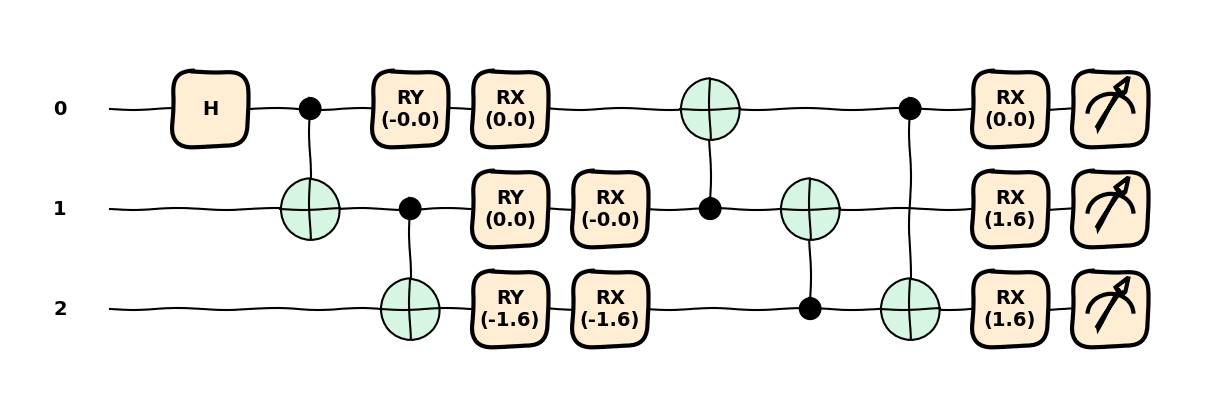

In [35]:
print(params)
qml.draw_mpl(optimized_circuit, decimals=1, style="sketch")(params)

In [33]:
optimized_circuit(params)

[array(1.), array(0.99999992), array(0.99999997)]